<a href="https://colab.research.google.com/github/HWMV/Test/blob/main/%08FinalPsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-2134089a42dc>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스테 데이터: (10000, 28, 28) 레이블: (10000,)


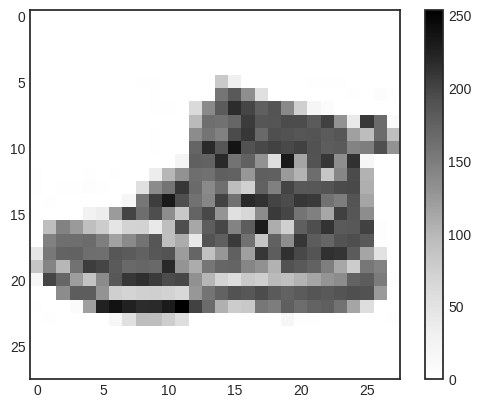

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 512)               401920    
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 64)                8256      
                                                                 
 hidden5 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330 

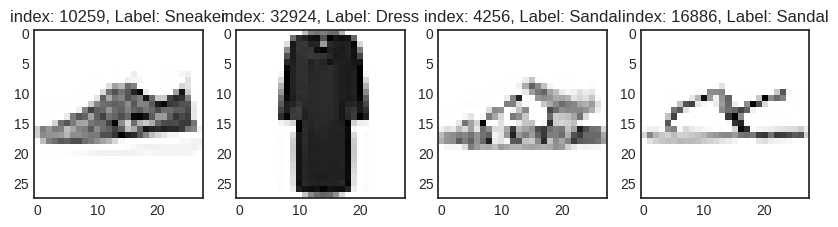

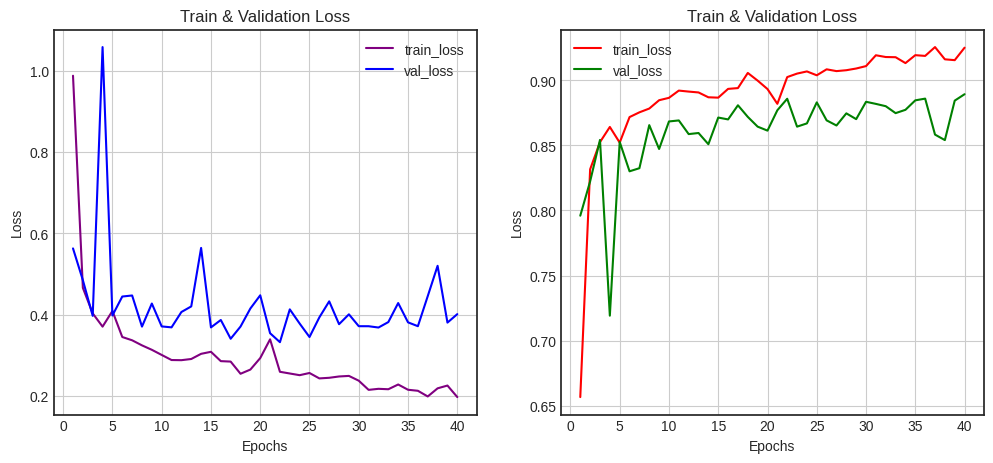

313/313 [==============================] - 1s 3ms/step - loss: 0.4386 - acc: 0.8762


[0.4386429190635681, 0.8762000203132629]

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

print("학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스테 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

class_names = ['T-shirt/top','Trouser', 'Pullover','Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

class_names[y_train[1]]

plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

num_sample = 4

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_idxs):
  image = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(image)
  plt.title('index: {}, Label: {}'.format(idx, class_names[label]))

x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28)) / 255.

input = Input(shape=(784, ), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(input)
hidden2 = Dense(256, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(64, activation='relu', name='hidden4')(hidden3)
hidden5 = Dense(32, activation='relu', name='hidden5')(hidden4)
output = Dense(10, activation='softmax', name='output')(hidden5)
model = Model(inputs=[input], outputs=output)

model.summary()

plot_model(model)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history.history.keys()
history_dict = history.history

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1 )
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='purple', label='train_loss')
ax1.plot(epochs, val_loss, color='blue', label='val_loss')
ax1.set_title('Train & Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='red', label='train_loss')
ax2.plot(epochs, val_acc, color='green', label='val_loss')
ax2.set_title('Train & Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()

In [5]:
model.evaluate(x_test, y_test)

pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[1])

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[6.1414717e-08 6.4338216e-13 9.9981999e-01 1.4344522e-09 1.1142357e-04
 3.8214497e-28 6.8509384e-05 1.4725015e-29 5.8844364e-16 8.5903050e-22]


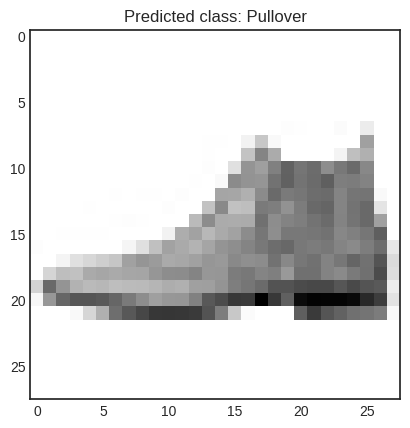

In [9]:
arg_pred_y = np.argmax(pred_ys, axis=1)
plt.imshow(x_test[0].reshape(-1, 28))
plt.title('Predicted class: {}'.format(class_names[arg_pred_y[1]]))

plt.show()

In [10]:
def plot_image(i, pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_ys)
  if predicted_label == y_test:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(pred_ys),
                                      class_names[y_test]), color=color)
  
def plot_value_array(i, pred_ys, true_label):
            pred_ys, true_label = pred_ys[i], true_label[i]
            plt.grid(False)
            plt.xticks([])
            plt.yticks([])
            thisplot = plt.bar(range(10), pred_ys, color='#777777')
            plt.ylim([0,1])
            predicted_label = np.argmax(pred_ys)

            thisplot[predicted_label].set_color('red')
            thisplot[true_label].set_color('blue')
            

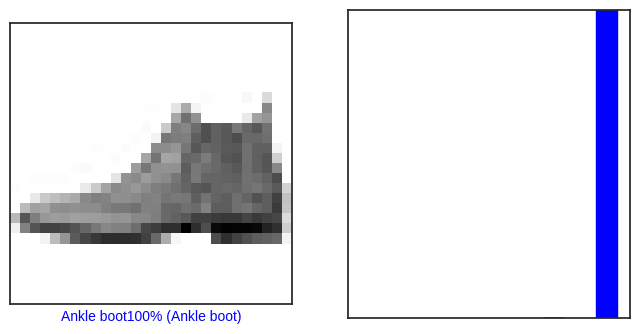

In [11]:
i = 0
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

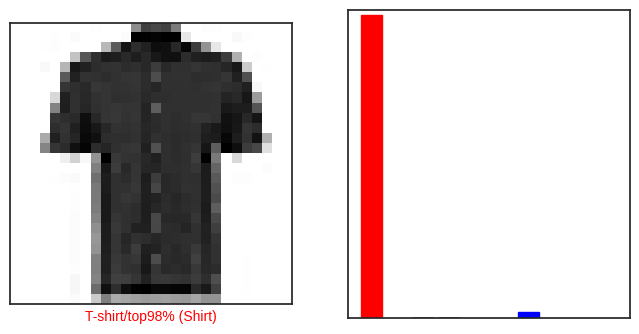

In [14]:
i = 40
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

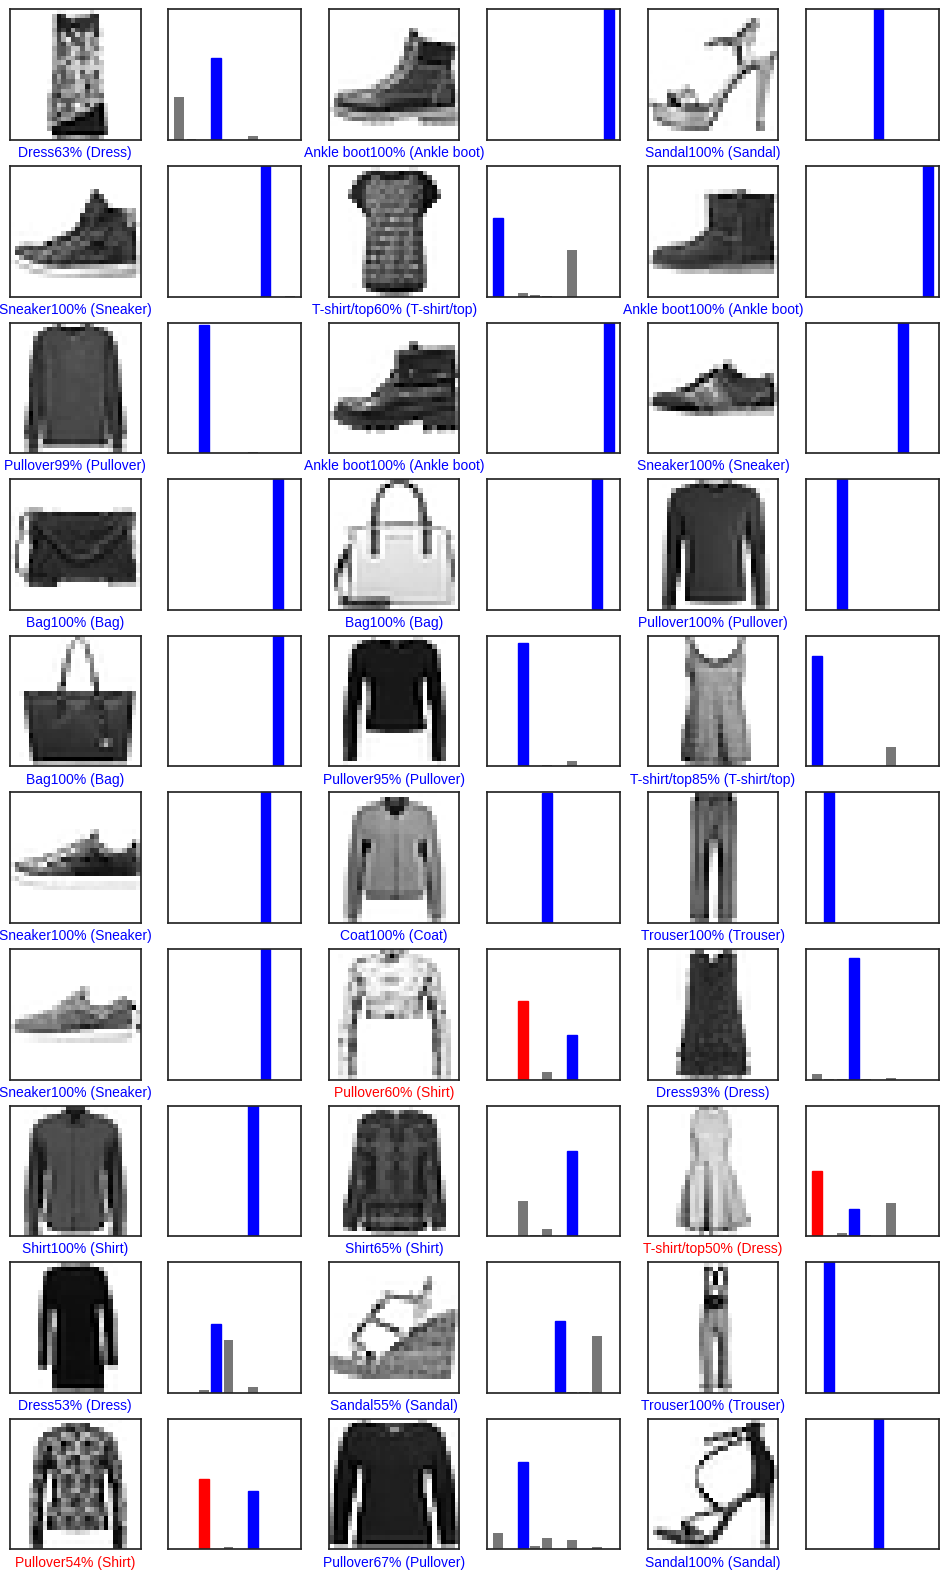

In [15]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, num in enumerate(random_num):
  plt.subplot(num_rows, 2*num_cols, 2*idx + 1)
  plot_image(num, pred_ys, y_test, x_test.reshape(-1,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*idx + 2)
  plot_value_array(num, pred_ys, y_test)

plt.show()

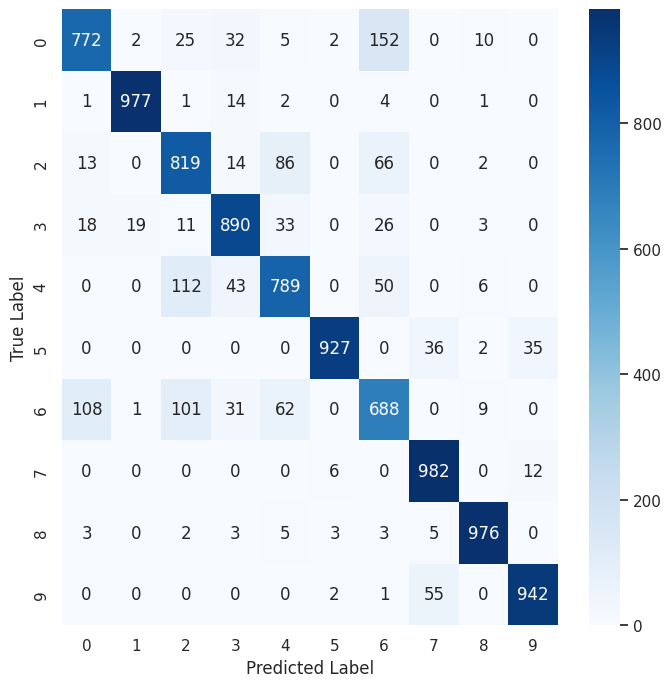

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1000
           1       0.98      0.98      0.98      1000
           2       0.76      0.82      0.79      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.79      0.80      1000
           5       0.99      0.93      0.96      1000
           6       0.69      0.69      0.69      1000
           7       0.91      0.98      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [16]:
from tensorflow.keras.utils import to_categorical

y_test_che = to_categorical(y_test)
y_test_che.shape

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8,8))
cm = confusion_matrix(np.argmax(y_test_che, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1)))